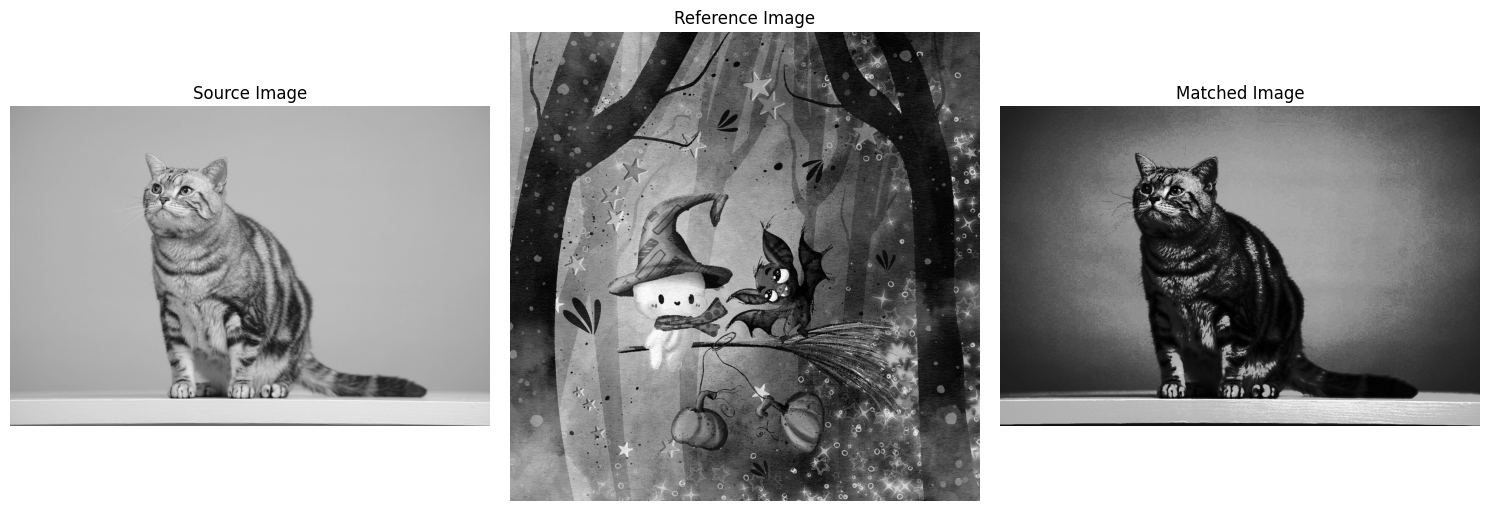

Matched image saved as matched_image.jpg


In [2]:
# histogram_specification.py

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def match_histograms(source_img, reference_img):
    # Convert images to arrays
    source_array = np.array(source_img)
    reference_array = np.array(reference_img)
    
    # Flatten the image arrays and calculate histograms
    source_hist, bin_edges = np.histogram(source_array.flatten(), bins=256, range=(0, 256))
    reference_hist, _ = np.histogram(reference_array.flatten(), bins=256, range=(0, 256))
    
    # Calculate cumulative distribution functions (CDFs)
    source_cdf = source_hist.cumsum()
    source_cdf = source_cdf / source_cdf[-1]
    reference_cdf = reference_hist.cumsum()
    reference_cdf = reference_cdf / reference_cdf[-1]
    
    # Create a lookup table to match source CDF to reference CDF
    lookup_table = np.interp(source_cdf, reference_cdf, bin_edges[:-1])

    # Map the source image pixels using the lookup table
    matched_array = np.interp(source_array.flatten(), bin_edges[:-1], lookup_table).reshape(source_array.shape)
    matched_img = Image.fromarray(matched_array.astype(np.uint8))
    
    return matched_img

# Display and save images
def display_and_save_images(source_path, reference_path, output_path):
    # Load images
    source_img = Image.open(source_path).convert("L")
    reference_img = Image.open(reference_path).convert("L")
    
    # Perform histogram specification
    matched_img = match_histograms(source_img, reference_img)
    
    # Save the matched image
    matched_img.save(output_path)
    
    # Display the images
    plt.figure(figsize=(15, 5))
    
    # Original source image
    plt.subplot(1, 3, 1)
    plt.imshow(source_img, cmap="gray")
    plt.title("Source Image")
    plt.axis("off")
    
    # Reference image
    plt.subplot(1, 3, 2)
    plt.imshow(reference_img, cmap="gray")
    plt.title("Reference Image")
    plt.axis("off")
    
    # Matched image
    plt.subplot(1, 3, 3)
    plt.imshow(matched_img, cmap="gray")
    plt.title("Matched Image")
    plt.axis("off")
    
    plt.tight_layout()
    plt.show()

# Example usage
if __name__ == "__main__":
    source_path = "input.jpg"         # Replace with path to the source image
    reference_path = "input2.jpg"    # Replace with path to the reference image
    output_path = "matched_image.jpg"   # Output path for the matched image
    display_and_save_images(source_path, reference_path, output_path)
    print(f"Matched image saved as {output_path}")
